# Final Project Phase 1

#### Download the data and load it into Python
***

In [2]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#Load the data and print the head to get an idea of the data
df = pd.read_csv('https://raw.githubusercontent.com/INFO590-Pythoneers/Final-Project-Repo/master/Phase%201/Data/BreastCancerWisconsin.csv')
print(df.head())

       Scn  A2  A3  A4  A5  A6  A7  A8  A9  A10  CLASS
0  1000025   5   1   1   1   2   1   3   1    1      2
1  1002945   5   4   4   5   7  10   3   2    1      2
2  1015425   3   1   1   1   2   2   3   1    1      2
3  1016277   6   8   8   1   3   4   3   7    1      2
4  1017023   4   1   1   3   2   1   3   1    1      2


#### Impute missing values
***

In [4]:
#Check to see if any columns contain any question marks
df.isin(['?']).any()

Scn      False
A2       False
A3       False
A4       False
A5       False
A6       False
A7        True
A8       False
A9       False
A10      False
CLASS    False
dtype: bool

In [5]:
#Update all values of ? to NaN and print how many of them were converted
A7 = df['A7'];
df['A7'] = df['A7'].replace("?", np.NaN)
df['A7'] = pd.to_numeric(df['A7'])
count = sum(pd.isnull(df['A7']))
print(str(count) + " of A7 is NaN.")


16 of A7 is NaN.


In [6]:
#Calculate the mean and replace all NaN values with it
mean = df['A7'].mean(skipna = True)
print("The mean of column A7 is " + str(mean))


The mean of column A7 is 3.5446559297218156


In [7]:
#Replace all NaN values with the mean and print out the count to confirm they have been replaced
df = df.fillna(mean)
count = sum(pd.isnull(df['A7']))
print(str(count) + " of A7 is NaN.")

0 of A7 is NaN.


#### Plot basic graphs 
*** 

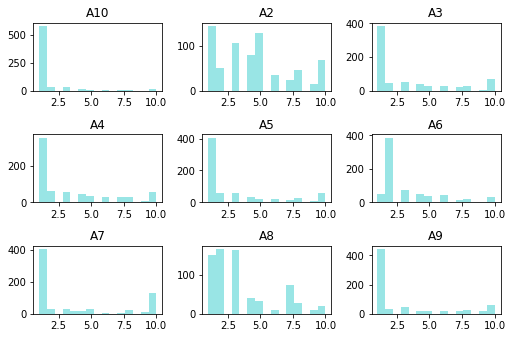

In [8]:
#Slice dataframe to include only columns A2-A10.
dfslice=df[['A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10']]
#Plot 9 histograms, one for each column of dfslice: 
dfslice.hist(grid=False, bins=15, color='c', alpha=0.4)
plt.tight_layout(rect=(0, 0, 1.2, 1.2))

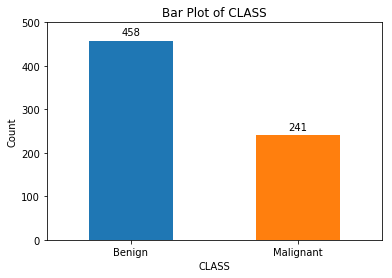

In [9]:
#Bar plot for CLASS 
ax = df['CLASS'].value_counts().plot(kind= 'bar', title= 'Bar Plot of CLASS', rot=0)
ax.set_ylim(0,500)
ax.set_xlabel("CLASS")
ax.set_xticklabels({'Benign','Malignant'})
ax.set_ylabel("Count")
for p in ax.patches: 
    ax.annotate(np.round(p.get_height(),decimals=2), (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 8), textcoords='offset points')

Correlation: 0.907


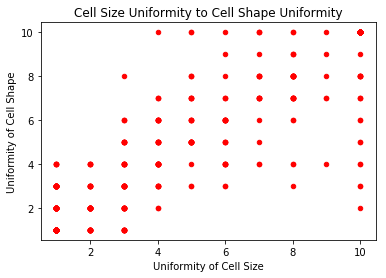

In [10]:
#Scatter plot to see relationship of cell size uniformity to cell shape uniformity

ax = df.plot(kind='scatter', x='A3', y='A4', color='red', title="Cell Size Uniformity to Cell Shape Uniformity")
ax.set_xlabel("Uniformity of Cell Size")
ax.set_ylabel("Uniformity of Cell Shape")

correlation = np.corrcoef(df['A3'], df['A4'])[0][1]
print("Correlation: {0:.3f}".format(correlation))

There appears to be high correlation between cell size uniformity and cell shape uniformity.

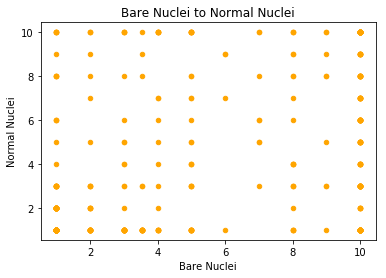

In [11]:
#Scatter plot to see relationship of bare nuclei to normal nuclei

ax = df.plot(kind='scatter', x='A7', y='A9', color='orange', title="Bare Nuclei to Normal Nuclei")
ax.set_xlabel("Bare Nuclei")
ax.set_ylabel("Normal Nuclei")
print()

There is no strong correlation between the bare nuclei and normal nuclei

#### Compute data statistics
***

In [12]:
#Print out summary statistcs of the dataframe
df.describe()

,Scn,A2,A3,A4,A5,A6,A7,A8,A9,A10,CLASS
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.544656,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,3.601852,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [13]:
#Print the number of rows and number of columns
num_rows, num_cols = df.shape
print("There are " + str(num_cols) + " columns and " + str(num_rows) + " rows.")

There are 11 columns and 699 rows.


In [14]:
#Report the number of unique ids
unique_count = df['Scn'].unique().size
print("There are " + str(unique_count) + " unique ids in the Scn column")

There are 645 unique ids in the Scn column


#### Mean, Median, Standard Deviation, Variance, and Coefficient of Variation Summary
***

In [15]:
#Create a label dictionary
labelDictionary = {
    "A2": "Clump Thickness",
    "A3": "Uniformity of Cell Size",
    "A4": "Uniformity of Cell Shape",
    "A5": "Marginal Adhesion",
    "A6": "Single Epithelial Cell Size",
    "A7": "Bare Nuclei",
    "A8": "Bland Chromatin",
    "A9": "Normal Nuclei",
    "A10": "Mitoses",
}
# Store variance, coefficient of variation for future use
varDictionary = {} 
coefDictionary = {}

# Calculate the mean, median, standard deviation and variance for A2 to A10
for index in df.iloc[:,1:10]:
    print(labelDictionary[index])
    print("********************************************")
    series = df[index]
    mean = series.mean()
    median = series.median()
    std = series.std()
    variance = series.var()
    varDictionary [labelDictionary[index]] = variance
    coef = std/mean
    coefDictionary [labelDictionary[index]] = coef
    print("Mean: {0:.3f}".format(mean))
    print("Median: {0:.0f}".format(median))
    print("Standard Deviation: {0:.3f}".format(std))
    print("Variance: {0:.3f}".format(variance))
    print("Coefficient of Variance: {0:.3f}".format(coef))
    print()

    

Clump Thickness
********************************************
Mean: 4.418
Median: 4
Standard Deviation: 2.816
Variance: 7.928
Coefficient of Variance: 0.637

Uniformity of Cell Size
********************************************
Mean: 3.134
Median: 1
Standard Deviation: 3.051
Variance: 9.311
Coefficient of Variance: 0.974

Uniformity of Cell Shape
********************************************
Mean: 3.207
Median: 1
Standard Deviation: 2.972
Variance: 8.832
Coefficient of Variance: 0.927

Marginal Adhesion
********************************************
Mean: 2.807
Median: 1
Standard Deviation: 2.855
Variance: 8.153
Coefficient of Variance: 1.017

Single Epithelial Cell Size
********************************************
Mean: 3.216
Median: 2
Standard Deviation: 2.214
Variance: 4.903
Coefficient of Variance: 0.689

Bare Nuclei
********************************************
Mean: 3.545
Median: 1
Standard Deviation: 3.602
Variance: 12.973
Coefficient of Variance: 1.016

Bland Chromatin
**************

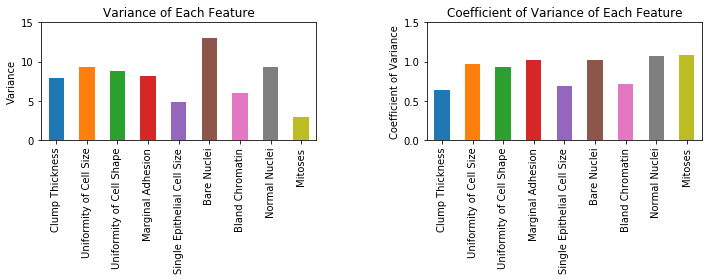

In [16]:
# Display bar chart of variance for each feature
f, ax = plt.subplots(ncols=2, figsize=(10,4))
varSeries = pd.Series(varDictionary)
varSeries.plot(kind= 'bar', title= 'Variance of Each Feature', ax=ax[0])
ax[0].set_ylabel("Variance")
ax[0].set_ylim(0,15)

coefSeries = pd.Series(coefDictionary)
coefSeries.plot(kind= 'bar', title= 'Coefficient of Variance of Each Feature', ax=ax[1])
ax[1].set_ylabel("Coefficient of Variance")
ax[1].set_ylim(0,1.5)

plt.tight_layout()
plt.subplots_adjust(wspace=.40)

#### Summary Report
"Bare Nuclei", "Normal Nuclei", "Uniformity of Cell Size", Uniformity of Cell Shape", "Clump Thickness" and "Marginal Adhesion" all have relatively higher variances compared to "Single Epithelial Cell Size", "Bland Chromatin" and "Mitosis". This higher variation will result in a greater weight for those features and will result in those features overly influencing the results in a cluster analysis. It would benefit to standardize the features so that all features can be given an equal weight during cluster analysis.

Although all the features in this study are measured on the same scale (1 to 10), they have different means and variation across those means. Another way to look at the variation is the coefficient of variance, also known as the relative standard deviation. It is a standardized measure of distribution and is defined by the ratio of the standard deviation to the mean. This is particularly useful for variables that are not measured on the same scale or units. As a rule of thumb, coefficient of variance values of one or greater tend to denote high variance and lower than one denote low variance. Based on the coefficient of variance graph above, "Marginal Adhesion", "Bare Nuclei", "Normal Nuclei" and "Mitoses" all have higher relative variation to their respective means.

The correlation coefficient between "Uniformity of Cell Size" and "Uniformity of Cell Shape" is 0.907 which is a strong positive correlation. Correlation coefficient is defined as the correlation or statistical relationship between two variables. The correlation coefficient values range from +1 to -1. When the coefficient value lies between ± 0.50 and ± 1, then it is said to be a strong correlation. When the value is zero there is no correlation, and all other values between ± 0.49 and zero are considered medium to low correlation. The strong correlation between "Uniformity of Cell Size" and "Uniformity of Cell Shape" could denote a possible intrinsic dimension for dimension reduction when performing our Principal Component Analysis.

The histograms show that for cell characteristics A3-A7, A9, and A10, the majority of sample IDs are quite low (under 2.5) and do not show a normal distribution. This skew will be an important facet of the data to note before other statistics are performed, and may introduce statistical outliers. In future exploration of this data, correlations between the values (potentially standardized, as discussed above) of these sample IDs and their 'class' will lead to a better understanding of what cellular characteristics determine the status of a breast tumor as benign or malignant. This could lead to useful advances in machine vision and other visual tools for diagnosis and prompt treatment.



# Final Project Phase 2

In [17]:
%matplotlib inline
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from matplotlib.legend import Legend

In [18]:
#Load the clean data sample from phase 1
df = pd.read_csv('https://raw.githubusercontent.com/INFO590-Pythoneers/Final-Project-Repo/master/Phase%202/Data/BreastCancerWisconsinUpdate.csv')
print(df.head())

       Scn  A2  A3  A4  A5  A6    A7  A8  A9  A10  CLASS
0  1000025   5   1   1   1   2   1.0   3   1    1      2
1  1002945   5   4   4   5   7  10.0   3   2    1      2
2  1015425   3   1   1   1   2   2.0   3   1    1      2
3  1016277   6   8   8   1   3   4.0   3   7    1      2
4  1017023   4   1   1   3   2   1.0   3   1    1      2


### Use KMeans algorithm

In [19]:
#Slice the dataframe to include only columns A2 through A10.
dfslice = df[['A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10']]

#Use KMeans clustering with n = 4 clusters.
model = KMeans(n_clusters=4)
model.fit(dfslice)

#Find the centroid locations per cluster.
centroids=model.cluster_centers_.round(4)
print('\t\tCentroids for Each Feature (using 4 clusters) \n')
pd.set_option('display.expand_frame_repr', False)
print(pd.DataFrame(centroids,columns=dfslice.axes[1]))

		Centroids for Each Feature (using 4 clusters) 

       A2      A3      A4      A5      A6      A7      A8      A9     A10
0  6.7625  8.3875  8.4250  7.7500  6.7750  9.2125  7.3750  7.7375  3.7875
1  2.9449  1.2445  1.3656  1.2930  2.0396  1.3514  2.0617  1.2004  1.0771
2  7.4648  7.0282  6.6761  4.1972  5.5352  3.4532  5.3803  6.8169  2.3099
3  7.2340  4.8511  5.0426  4.8617  4.1170  9.3830  5.2660  3.7872  1.6489


### Find the optimal number of clusters

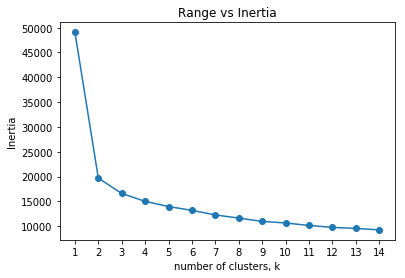

In [20]:
# make a range from 1 to 15
ks = range(1, 15)

# create an empty list
inertias = []

# for loop to calculate KMeans for each values 
for k in ks:
    model =KMeans(n_clusters=k) 
    model.fit(dfslice)    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot Range vs Inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('Inertia')
plt.title('Range vs Inertia')
plt.xticks(ks)
plt.show()

The optimal number of clusters is determined when inertia begins to decrease at a slower pace, also known as the "elbow" in the inertia plot. In our data sample above the optimal number of clusters is two.  

In [21]:
#Use KMeans clustering with n = 2 clusters.
model = KMeans(n_clusters=2)
model.fit(dfslice)

#Find the centroid locations per cluster.
centroids=model.cluster_centers_.round(4)
print('  Centroids for Each Feature without Standardized Scaling (2 clusters) \n')
pd.set_option('display.expand_frame_repr', False)
print(pd.DataFrame(centroids,columns=dfslice.axes[1]))

  Centroids for Each Feature without Standardized Scaling (2 clusters) 

       A2      A3      A4      A5      A6     A7      A8      A9     A10
0  7.1588  6.7983  6.7296  5.7339  5.4721  7.874  6.1030  6.0773  2.5494
1  3.0472  1.3026  1.4464  1.3433  2.0880  1.380  2.1052  1.2618  1.1094


### Revise the data variation

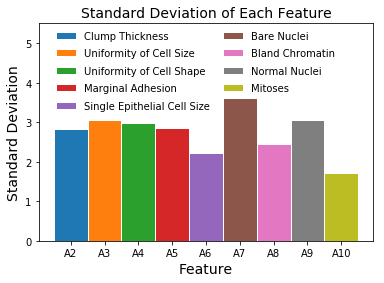

In [22]:
#Create a label dictionary
labelDictionary = {
    "A2": "Clump Thickness",
    "A3": "Uniformity of Cell Size",
    "A4": "Uniformity of Cell Shape",
    "A5": "Marginal Adhesion",
    "A6": "Single Epithelial Cell Size",
    "A7": "Bare Nuclei",
    "A8": "Bland Chromatin",
    "A9": "Normal Nuclei",
    "A10": "Mitoses",
}
# Calculate the standard deviation for A2 to A10
x = 0
limit = 5.5
fig, ax = plt.subplots()
for index in df.iloc[:,1:10]:
    series = df[index]
    std = series.std()
    bar =plt.bar([x], [std], width=1, edgecolor='white')
    xpos = 0.04 if x < 5 else 0.54
    ypos = 0.9 - x * 0.08 if x < 5 else 0.9 - (x-5) * 0.08
    leg = Legend(ax, [bar], [labelDictionary[index]], frameon = False, loc=[xpos, ypos])
    ax.add_artist(leg);
    x=x+1

#Plot bar graph with legends and ticks   
plt.ylabel("Standard Deviation", fontsize=14)
plt.xlabel("Feature", fontsize=14)
plt.ylim(0, limit)
plt.title("Standard Deviation of Each Feature", fontsize=14)
plt.xticks(np.arange(9), labelDictionary.keys())

plt.show()

"Clump Thickness", "Uniformity of Cell Size", Uniformity of Cell Shape", "Marginal Adhesion", "Bare Nuclei" and "Normal Nuclei" all have relatively higher standard deviation compared to "Single Epithelial Cell Size", "Bland Chromatin" and "Mitosis". This higher variation will result in a greater weight for those features and will result in those features overly influencing the results in a cluster analysis. In the kmeans algorithm, feature variance is equal to feature influence. We need to standardize the features so that all features can be given an equal weight during cluster analysis. In the next step we will normalize the data by using a standard scaler to tranform each feature to have a mean of 0 and a variance of 1 to give them equal weighting.

### Implement Normalization

In [23]:
#Normalize data using the standard scaler to give mean of 0 and variance of 1
scaler = StandardScaler()
kmeans = KMeans(n_clusters = 2)
pipeline = make_pipeline(scaler, kmeans)
pipeline.fit(dfslice)

#Format the output the centroids
centroids=kmeans.cluster_centers_.round(4)
print('   Centroids for Each Feature with Standardized Scaling (2 clusters) \n')
pd.set_option('display.expand_frame_repr', False)
print(pd.DataFrame(centroids,columns=dfslice.axes[1]))

   Centroids for Each Feature with Standardized Scaling (2 clusters) 

       A2      A3      A4      A5      A6      A7      A8      A9     A10
0 -0.4962 -0.6069 -0.6021 -0.5149 -0.5097 -0.5806 -0.5477 -0.5308 -0.3038
1  0.9861  1.2060  1.1965  1.0232  1.0129  1.1538  1.0884  1.0548  0.6036


# Final Project Phase 3

### Cluster

In [24]:
#Slice the dataframe to include only columns A2 through A10.
dfslice = df[['A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10']]

#Use KMeans clustering with n = 2 clusters, 20 different centroid seeds and 500 maximum iterations.
model = KMeans(n_clusters=2, n_init=20, max_iter=500)
model.fit(dfslice)

#Find the centroid locations per cluster.
centroids=model.cluster_centers_
print(' Centroids for Each Feature with 20 centroid seeds & 500 max iterations (2 clusters) \n')
pd.set_option('display.expand_frame_repr', False)
print(pd.DataFrame(centroids,columns=dfslice.axes[1]))

 Centroids for Each Feature with 20 centroid seeds & 500 max iterations (2 clusters) 

         A2        A3        A4        A5        A6        A7        A8        A9       A10
0  3.047210  1.302575  1.446352  1.343348  2.087983  1.380001  2.105150  1.261803  1.109442
1  7.158798  6.798283  6.729614  5.733906  5.472103  7.873966  6.103004  6.077253  2.549356


In [25]:
#Save predicted clusters into a variable labels
labels = model.predict(dfslice)
print(labels)

[0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1
 0 1 1 1 1 1 1 1 0 1 0 0 1 0 0 1 1 1 1 1 0 1 0 1 0 1 0 0 0 0 1 1 0 0 1 0 1
 1 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 1 1 0 1 0
 1 1 1 0 0 0 1 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0
 0 1 0 1 1 0 0 1 0 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 1
 0 1 1 1 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0 0 0 1 1 0 1 1 1 0 0 1 0 0 1
 0 1 1 0 1 1 0 1 1 1 0 1 0 0 1 1 1 1 0 0 0 0 0 0 1 1 0 0 0 1 1 1 1 1 0 0 0
 1 1 1 1 1 1 0 1 1 1 0 1 0 1 0 0 0 0 0 0 1 0 0 1 1 1 1 1 0 1 1 0 0 1 1 0 1
 1 0 0 1 1 0 1 0 1 1 0 0 1 0 0 0 1 0 0 1 1 1 0 1 1 0 0 1 0 0 1 0 1 1 1 0 0
 1 1 0 1 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0 0 1 1 1 1 1 0 0 0 0 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0
 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 1 1 0 0 0 1 1 0 0 1 0 

### DataFrame

In [26]:
#Create a new column in your dataframe and add Kmeans labels
df["labels"] = labels

#Change label values so that 0 becomes 2 and 1 becomes 4
df["labels"].replace(0, 2, True)
df["labels"].replace(1, 4, True)    

#Print the first 15 records from your dataframe
print(df.head(n=15))

        Scn  A2  A3  A4  A5  A6    A7  A8  A9  A10  CLASS  labels
0   1000025   5   1   1   1   2   1.0   3   1    1      2       2
1   1002945   5   4   4   5   7  10.0   3   2    1      2       4
2   1015425   3   1   1   1   2   2.0   3   1    1      2       2
3   1016277   6   8   8   1   3   4.0   3   7    1      2       4
4   1017023   4   1   1   3   2   1.0   3   1    1      2       2
5   1017122   8  10  10   8   7  10.0   9   7    1      4       4
6   1018099   1   1   1   1   2  10.0   3   1    1      2       2
7   1018561   2   1   2   1   2   1.0   3   1    1      2       2
8   1033078   2   1   1   1   2   1.0   1   1    5      2       2
9   1033078   4   2   1   1   2   1.0   2   1    1      2       2
10  1035283   1   1   1   1   1   1.0   3   1    1      2       2
11  1036172   2   1   1   1   2   1.0   2   1    1      2       2
12  1041801   5   3   3   3   2   3.0   4   4    1      4       2
13  1043999   1   1   1   1   2   3.0   3   1    1      2       2
14  104457

### Error Rate Function

In [28]:
# Define the error rate function.
# Returns a tuple object with benign error rate, malignant error and total error rate respectively.
def errorRate(predictions, actuals):
    
    #Calculate error for benign
    total_predicted_malignant_actually_benign = 0
    total_predicted_benign = 0
    for predicted, actual in zip(predictions, actuals):
        if (predicted == 2):
            total_predicted_benign += 1
        elif (actual == 2):
            total_predicted_malignant_actually_benign += 1
    benign_error_rate = total_predicted_malignant_actually_benign / total_predicted_benign

    #Calculate error for malignant
    total_predicted_benign_actually_malignant = 0
    total_predicted_malignant = 0
    for predicted, actual in zip(predictions, actuals):
        if (predicted == 4):
            total_predicted_malignant += 1
        elif (actual == 4):
            total_predicted_benign_actually_malignant += 1
    malignant_error_rate = total_predicted_benign_actually_malignant / total_predicted_malignant
    
    #Calculate total error
    total_predicted_wrong = total_predicted_malignant_actually_benign + total_predicted_benign_actually_malignant
    total_predicted = total_predicted_benign + total_predicted_malignant
    total_error_rate = total_predicted_wrong / total_predicted
    
    return (benign_error_rate, malignant_error_rate, total_error_rate)


benign_error_rate, malignant_error_rate, total_error_rate = errorRate(df["labels"], df["CLASS"])

#Print the results
print("Error rate for benign: "+str(benign_error_rate))
print("Error rate for malignant: "+str(malignant_error_rate))
print("Total error rate: "+str(total_error_rate))

Error rate for benign: 0.023605150214592276
Error rate for malignant: 0.0815450643776824
Total error rate: 0.04291845493562232


### Report

In this project we examined breast cancer data from University of Wisconsin, and how certain visual characteristics of these cells may play a role in their classification of benign or malignant. Our goal was to use that information to create a model which would predict the classification (benign or malignant) of future cell images. We used K Means clustering for the model - first predicting the ideal number of clusters, then normalizing the data, and finally calculating the model’s rate of error in each type of prediction.

We found that using 2 clusters was ideal based on our range vs inertia plot, where beyond 2 clusters the change in inertia dropped dramatically. K Means did a fairly good job of correctly classifying benign vs. malignant cancer cells. The model was 98% accurate at predicting benign cells, and 92% accurate at predicting malignant cells. This accuracy gives us some confidence in being able to correctly classify future breast cancer biopsy results as benign or malignant.

The collaborative Python workflow using GitHub and Jupyter was educational and we were interested to find that each of us found a completely unique way to code the error rate functions. During the course of the project, in addition to using the K Means algorithm, we were able to practice normalizing any high-variance data. We also worked with matplotlib to make histograms, bar charts, and a range vs. inertia plot to predict the optimal k value.